# Libraries

In [5]:
library(tidyverse)
library(tidymodels)
library(dplyr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

# Reading, wrangling and splitting the data

Parsed with column specification:
cols(
  buying = col_character(),
  maint = col_character(),
  doors = col_character(),
  persons = col_character(),
  lug_boot = col_character(),
  safety = col_character(),
  eval = col_character()
)

`summarise()` regrouping output by 'buying' (override with `.groups` argument)

`summarise()` regrouping output by 'maint' (override with `.groups` argument)



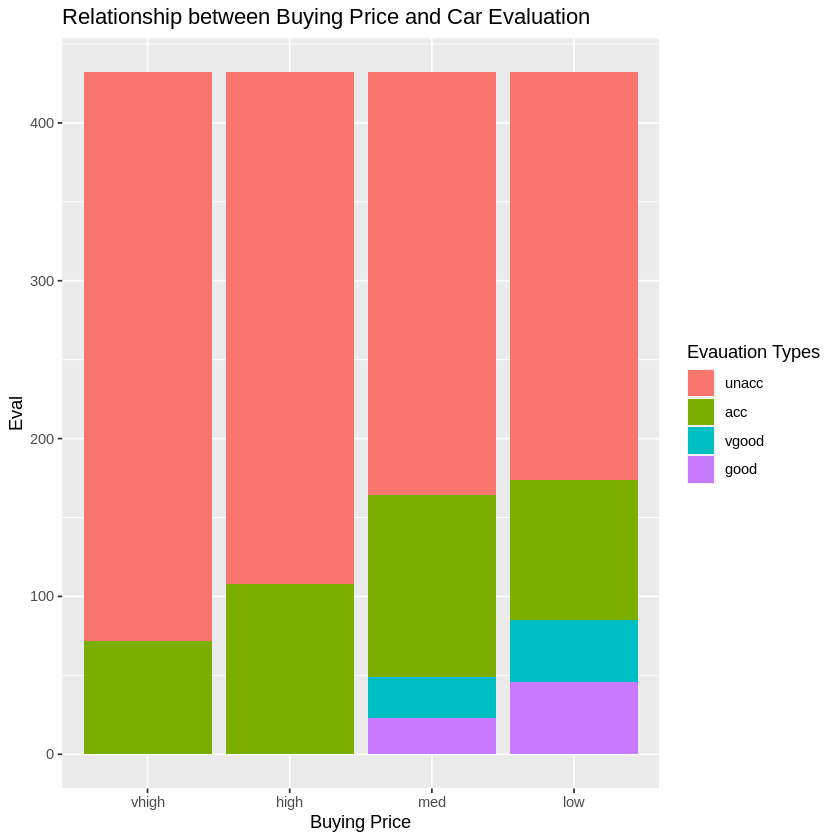

`summarise()` regrouping output by 'doors' (override with `.groups` argument)



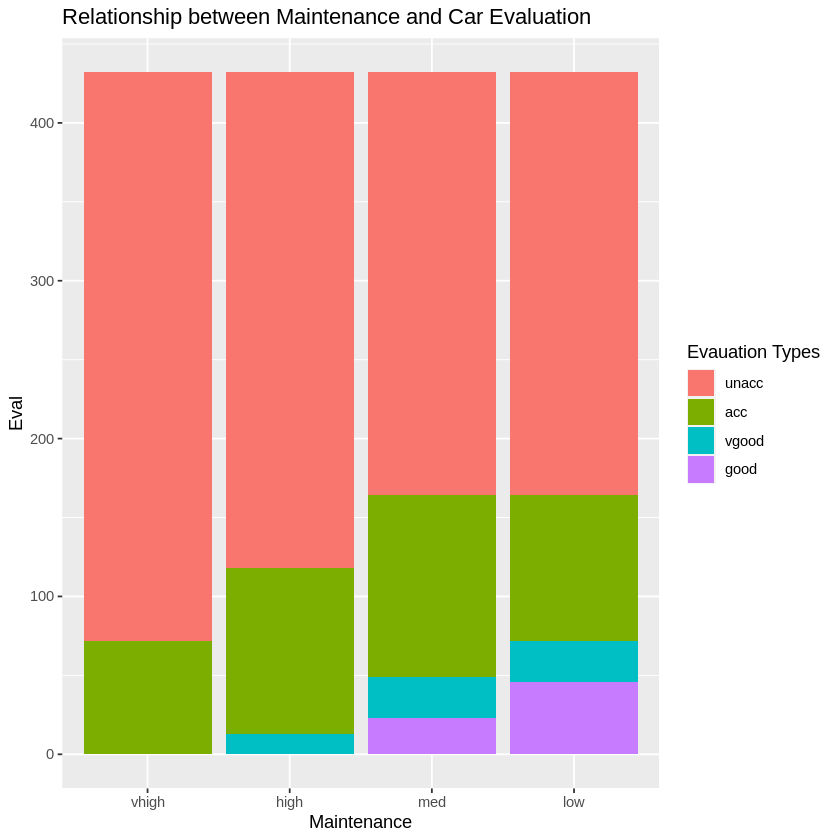

`summarise()` regrouping output by 'persons' (override with `.groups` argument)



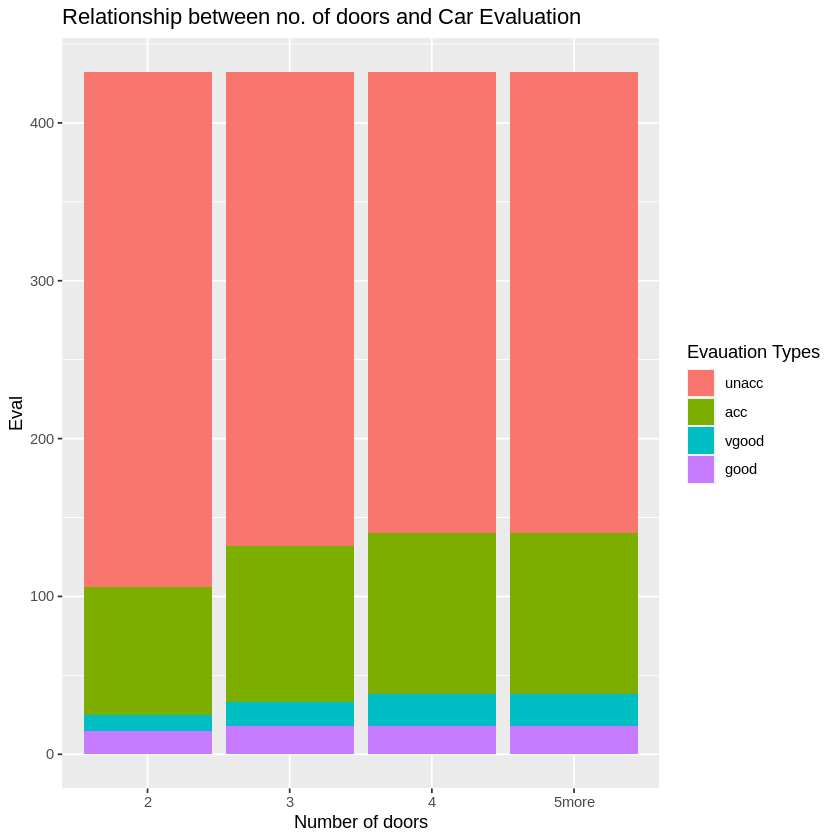

`summarise()` regrouping output by 'lug_boot' (override with `.groups` argument)



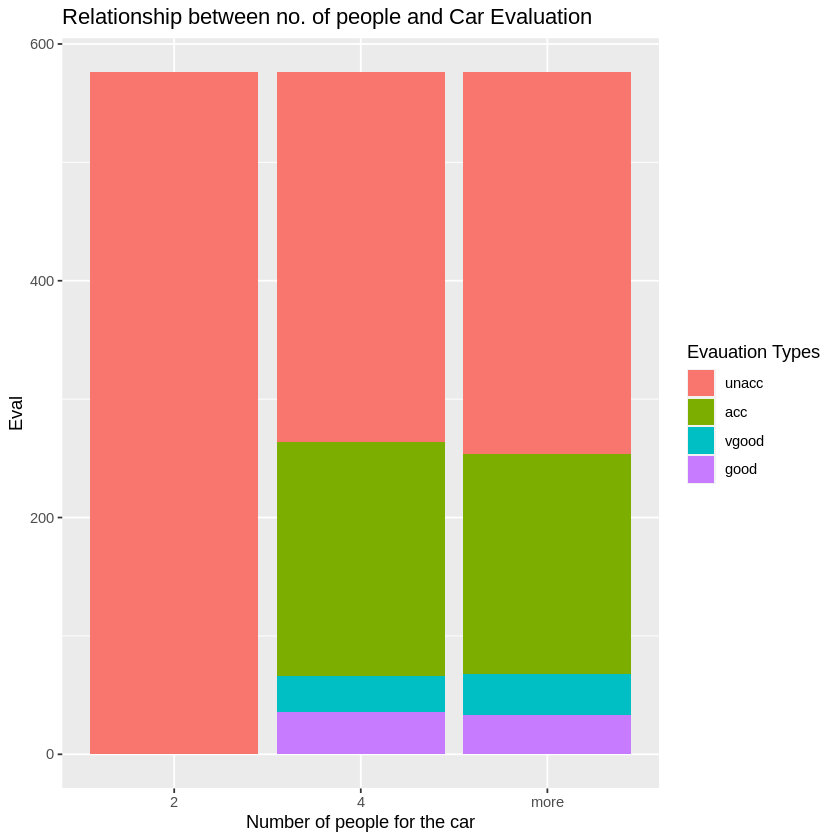

`summarise()` regrouping output by 'safety' (override with `.groups` argument)



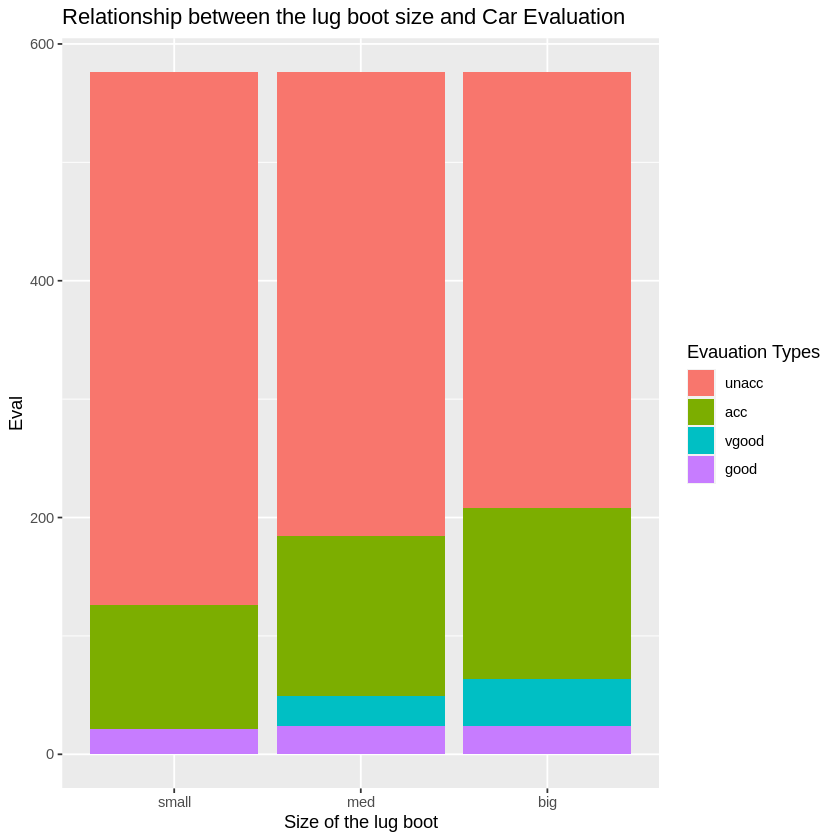

ERROR: Error in grid.arrange(car_buying_plot, car_safety_plot): could not find function "grid.arrange"


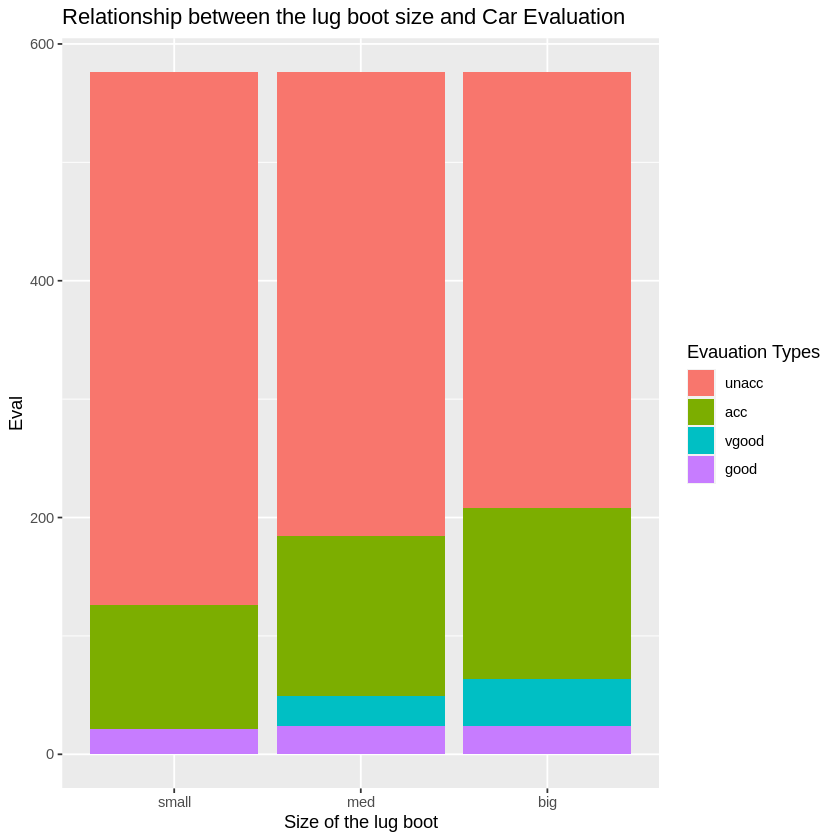

In [55]:
set.seed(5)

## Reading and Mutating the Data

car<-read_csv("cardata.csv") %>% 
mutate(
    buying = as_factor(buying))  %>% 
mutate(
    maint = as_factor(maint)) %>% 
mutate(
    doors = as_factor(doors)) %>% 
mutate(
    persons = as_factor(persons)) %>%
mutate(
    lug_boot = as_factor(lug_boot)) %>%
mutate(
    safety = as_factor(safety)) %>%
mutate(
    eval = as_factor(eval))

## Sample Visualization for different predictors present

#buying
car_buying_plot <-  car %>%
                    select(buying, eval) %>%
                group_by(buying, eval) %>%
                summarise(count = n()) %>%
                  ggplot(aes(x = buying, y =  count, fill = eval)) +
                  geom_bar(stat = "identity") +
                    xlab("Buying Price") +
                    ylab("Eval") +
                    labs(fill = "Evauation Types") +
                    ggtitle("Relationship between Buying Price and Car Evaluation") 
                car_buying_plot

#maint
car_maint_plot <-  car %>%
                    select(maint, eval) %>%
                group_by(maint, eval) %>%
                summarise(count = n()) %>%
                  ggplot(aes(x = maint, y =  count, fill = eval)) +
                  geom_bar(stat = "identity") +
                    xlab("Maintenance") +
                    ylab("Eval") +
                    labs(fill = "Evauation Types") +
                    ggtitle("Relationship between Maintenance and Car Evaluation") 
                car_maint_plot

#doors
car_doors_plot <-  car %>%
                    select(doors, eval) %>%
                group_by(doors, eval) %>%
                summarise(count = n()) %>%
                  ggplot(aes(x = doors, y =  count, fill = eval)) +
                  geom_bar(stat = "identity") +
                    xlab("Number of doors") +
                    ylab("Eval") +
                    labs(fill = "Evauation Types") +
                    ggtitle("Relationship between no. of doors and Car Evaluation") 
                car_doors_plot

#persons
car_persons_plot <-  car %>%
                    select(persons, eval) %>%
                group_by(persons, eval) %>%
                summarise(count = n()) %>%
                  ggplot(aes(x = persons, y =  count, fill = eval)) +
                  geom_bar(stat = "identity") +
                    xlab("Number of people for the car") +
                    ylab("Eval") +
                    labs(fill = "Evauation Types") +
                    ggtitle("Relationship between no. of people and Car Evaluation") 
                car_persons_plot

#lug_boot
car_lugboot_plot <-  car %>%
                    select(lug_boot, eval) %>%
                group_by(lug_boot, eval) %>%
                summarise(count = n()) %>%
                  ggplot(aes(x = lug_boot, y =  count, fill = eval)) +
                  geom_bar(stat = "identity") +
                    xlab("Size of the lug boot") +
                    ylab("Eval") +
                    labs(fill = "Evauation Types") +
                    ggtitle("Relationship between the lug boot size and Car Evaluation") 
                car_lugboot_plot
#safety

car_safety_plot <-  car %>%
                    select(safety, eval) %>%
                group_by(safety, eval) %>%
                summarise(count = n()) %>%
                  ggplot(aes(x = safety, y =  count, fill = eval)) +
                  geom_bar(stat = "identity") +
                    xlab("Safety evaluation") +
                    ylab("Eval") +
                    labs(fill = "Evauation Types") +
                    ggtitle("Relationship between the safety and Car Evaluation") 
                car_lugboot_plot

## Training the Data

car_split <- initial_split(car_train, prop = 0.75, strata = eval)
car_train <- training(car_split)
car_test <- testing(car_split)

car_recipe <- recipe(eval ~ ., data = car_train) %>%
  step_scale(all_predictors()) %>%
  step_center(all_predictors())

knn_spec <- nearest_neighbour(weight_func = "rectangular", neighbours = 4) %>%
    set_engine("kknn")
    set_mode("classification")

car_fit <- workflow() %>%
    add_recipe(car_recipe) %>%
    add_model(knn_spec) %>%
    fit(data = car_train)


